In [1]:
%load_ext autoreload
%autoreload 2
from fibsem.microscopes.odemis_microscope import OdemisMicroscope
from fibsem.structures import FibsemStagePosition

from fibsem import utils

microscope, settings = utils.setup_session(manufacturer="Odemis")


# pip install pylibtiff

Default configuration: default-configuration
Default configuration path: /home/patrick/development/openfibsem/fibsem/fibsem/config/microscope-configuration.yaml


2024-04-03 00:03:46,866 — root — INFO — setup_session:216 — Finished setup for session: demo_2024-04-03-12-03-46AM


/home/patrick/miniconda3/envs/autoscript49/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
stage_position = microscope.get_stage_position()
print('Stage position:', stage_position)

Stage position: FibsemStagePosition(name=None, x=0.0, y=0.0, z=0.0, r=0.0, t=0.0, coordinate_system='RAW')


In [3]:
stage_position = microscope.get_stage_position()
print('Stage position:', stage_position)

# microscope.move_stage_absolute(FibsemStagePosition(x=0.1, y=0.1, z=0.1, r=0.1, t=0.1))
microscope.move_stage_relative(FibsemStagePosition(x=50e-3))
stage_position = microscope.get_stage_position()
print('Stage position:', stage_position)

import time
time.sleep(2)

microscope.move_stage_absolute(FibsemStagePosition(x=0, y=0, z=0, r=0, t=0))
stage_position = microscope.get_stage_position()
print('Stage position:', stage_position)

Stage position: FibsemStagePosition(name=None, x=0.0, y=0.0, z=0.0, r=0.0, t=0.0, coordinate_system='RAW')
Stage position: FibsemStagePosition(name=None, x=0.05, y=0.0, z=0.0, r=0.0, t=0.0, coordinate_system='RAW')
Stage position: FibsemStagePosition(name=None, x=0.0, y=0.0, z=0.0, r=0.0, t=0.0, coordinate_system='RAW')


BeamType.ION
2024-04-03 00:03:50,338 — root — INFO — run:518 — Starting acquisition of 1 streams, with expected duration of 1.672864 s
2024-04-03 00:03:50,339 — root — INFO — run:539 — Acquisition task has no SettingsObserver, not saving extra metadata.
2024-04-03 00:03:50,341 — root — INFO — _startAcquisition:119 — Trying to activate stream while it's not supposed to update


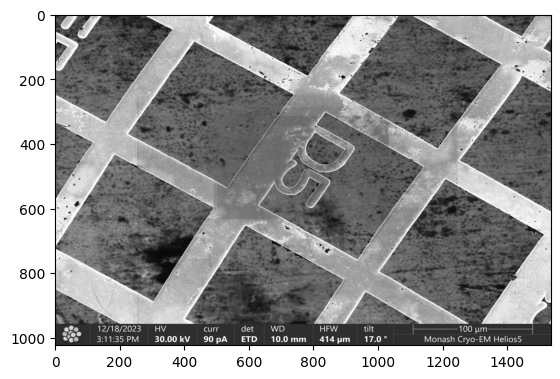

In [4]:
from fibsem import acquire
from fibsem.structures import ImageSettings, BeamType

image_settings = ImageSettings(beam_type=BeamType.ION)
print(image_settings.beam_type)
image = acquire.acquire_image(microscope, image_settings)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image.data, cmap='gray')
plt.show()



In [39]:
from fibsem.structures import FibsemRectangleSettings
pattern_settings = FibsemRectangleSettings(
    centre_x=0, centre_y=0, width=10e-6, height=10e-6, depth=0.5e-6
)
microscope.draw_rectangle(pattern_settings)

# microscope.draw_rectangle({"center_x": 0, "center_y": 0, 
#                          "width": 10e-6, "height": 10e-6, 
#                          "depth": 0.5e-6})

{'width': 1e-05, 'height': 1e-05, 'depth': 5e-07, 'rotation': 0, 'centre_x': 0, 'centre_y': 0, 'cleaning_cross_section': False, 'scan_direction': 'TopToBottom', 'cross_section': 'Rectangle', 'passes': 0}


In [41]:
microscope.finish_milling(0, 0)
microscope.estimate_milling_time()
# microscope.run_milling(0, 0,  asynch=True)

0

In [42]:
from fibsem.structures import PatterningState 

while microscope.get_milling_state() != PatterningState.IDLE:
    print('Milling in progress')
    time.sleep(1)


In [37]:
microscope.finish_milling(0, 0)